In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_url = '/content/drive/MyDrive/FaceID/Train'

validation = ImageDataGenerator(rescale=1./255)
validation_url = '/content/drive/MyDrive/FaceID/Validation'

In [ ]:
train_dataset = train.flow_from_directory(train_url,
                                          target_size = (150,150),
                                          batch_size = 128,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(validation_url,
                                                    target_size = (150,150),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')

Found 1877 images belonging to 5 classes.
Found 231 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'Cuong': 0, 'Hieu': 1, 'Khai': 2, 'Thu': 3, 'Trong': 4}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
15/15 [==============================] - 950s 63s/step - loss: 1.5317 - accuracy: 0.3245 - val_loss: 1.4405 - val_accuracy: 0.3636
Epoch 2/50
15/15 [==============================] - 14s 899ms/step - loss: 1.0870 - accuracy: 0.5988 - val_loss: 0.6064 - val_accuracy: 0.9437
Epoch 3/50
15/15 [==============================] - 14s 906ms/step - loss: 1.2985 - accuracy: 0.5962 - val_loss: 0.9578 - val_accuracy: 0.7749
Epoch 4/50
15/15 [==============================] - 14s 903ms/step - loss: 1.3871 - accuracy: 0.7118 - val_loss: 1.0806 - val_accuracy: 0.3723
Epoch 5/50
15/15 [==============================] - 14s 892ms/step - loss: 1.1086 - accuracy: 0.5706 - val_loss: 0.7505 - val_accuracy: 0.6234
Epoch 6/50
15/15 [==============================] - 14s 900ms/step - loss: 0.5717 - accuracy: 0.7347 - val_loss: 0.4435 - val_accuracy: 0.6926
Epoch 7/50
15/15 [==============================] - 13s 887ms/step - loss: 0.4332 - accuracy: 0.8050 - val_loss: 0.1889 - val_accuracy: 0.9610


In [ ]:
model.save('/content/drive/MyDrive/FaceID/predict/Final_test.h5')

In [ ]:
model_Final = load_model('/content/drive/MyDrive/FaceID/predict/Final_test.h5')

In [ ]:
score=model_Final.evaluate(validation_dataset,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

2/2 [==============================] - 1s 216ms/step - loss: 4.7557e-04 - accuracy: 1.0000
Sai số:  0.0004755685804411769
Độ chính xác:  1.0


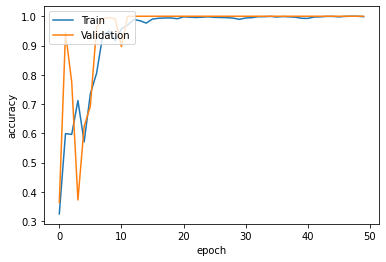

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Dự đoán là:  Cuong


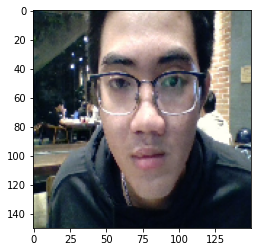

In [ ]:
img = load_img('/content/drive/MyDrive/FaceID/predict/WIN_20220622_01_14_11_Pro.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Cuong', 'Hieu', 'Khai', 'Thu', 'Trong']
print('Dự đoán là: ',Label[int(np.argmax(model_Final.predict(img),axis=-1))])
